In [62]:
import qiskit as qk
from qiskit import IBMQ,Aer
from qiskit import *
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info.operators import Operator
from qiskit.providers.ibmq import least_busy

my_provider = IBMQ.get_provider()


Let's first setup the n=2 Qbit circuit

In [63]:
q = qk.QuantumRegister(2)
qc = qk.QuantumCircuit(q)

Let's encode binary number 10 (2) to our qubits for testing the cicruit after it's done

In [64]:
#qubit 0 is in state 0 and qubit 1 is in state 1
qc.x(1)

Let's apply QFT

C:\devel\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  


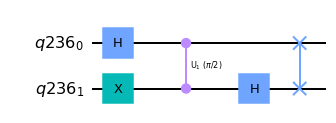

In [65]:
qc.h(0)
qc.cu1(pi/2,1,0)
qc.h(1)
qc.swap(0,1)

qc.draw('mpl')

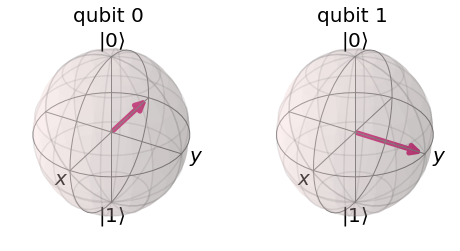

In [66]:
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

Now let's do the same circuit except we apply inverse QFT at the end to check if we get binary number 10 (2)

C:\devel\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  # Remove the CWD from sys.path while we load stuff.
C:\devel\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.


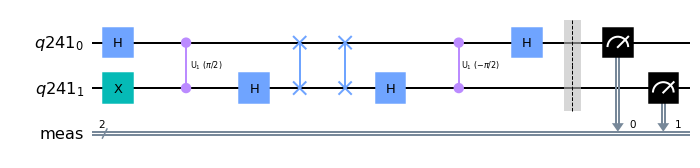

In [67]:
#setup circuit
q = qk.QuantumRegister(2)
qc = qk.QuantumCircuit(q)

#encode number 2 into our qubits
qc.x(1)

#apply QFT
qc.h(0)
qc.cu1(pi/2,1,0)
qc.h(1)
qc.swap(0,1)

#inverse QFT for 2 qubits
qc.swap(0,1)
qc.h(1)
qc.cu1(-pi/2,1,0)
qc.h(0)

#measure all
qc.measure_all()

#draw the circuit
qc.draw('mpl')

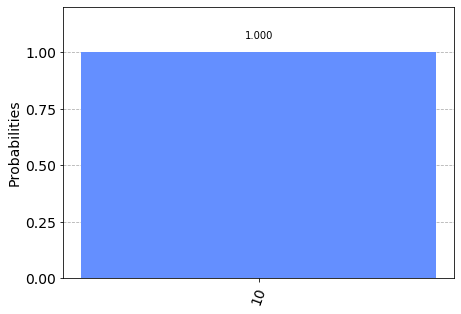

In [68]:

shots = 1024
job = execute(qc, backend=backend, shots=shots, optimization_level=3)

counts = job.result().get_counts()
plot_histogram(counts)

I haven't been able to run these with real quantum computer. I don't know what's the reason. Maybe they are just so busy. Now let's do the same thing with n=3 Qbits. The QFT circuit is a little bit more complex this time.

C:\devel\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  if sys.path[0] == '':
C:\devel\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  del sys.path[0]
C:\devel\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.


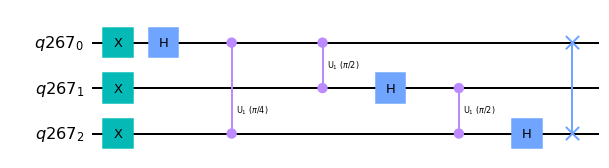

In [73]:
#Setup the circuit
q3 = qk.QuantumRegister(3)
qc3 = qk.QuantumCircuit(q3)

#encode number 7 into our qubits
qc3.x(2)
qc3.x(1)
qc3.x(0)

#apply QFT
qc3.h(0)
qc3.cu1(pi/4,2,0)
qc3.cu1(pi/2,1,0)


qc3.h(1)
qc3.cu1(pi/2,2,1)

qc3.h(2)

qc3.swap(0,2)


#draw the circuit
qc3.draw('mpl')

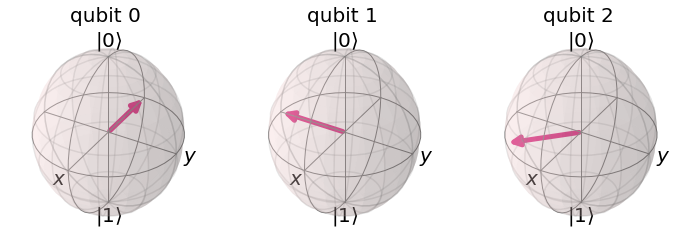

In [74]:

statevector = execute(qc3, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)


Now let's apply the inverse QFT at the end of the circuit and measure

C:\devel\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\devel\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  
C:\devel\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  import sys


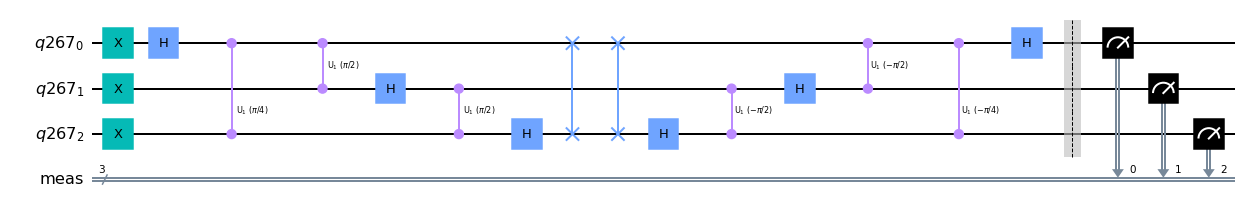

In [75]:
qc3.swap(0,2)
qc3.h(2)
qc3.cu1(-pi/2,2,1)

qc3.h(1)
qc3.cu1(-pi/2,1,0)
qc3.cu1(-pi/4,2,0)
qc3.h(0)

qc3.measure_all()

qc3.draw('mpl')

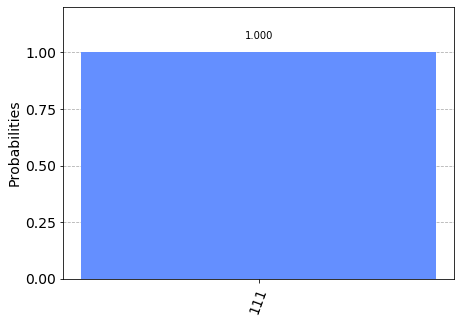

In [76]:
shots = 1024
job = execute(qc3, backend=backend, shots=shots, optimization_level=3)

counts = job.result().get_counts()
plot_histogram(counts)

Indeed we get binary number 111 (=7).